In [1]:
import numpy as np
import scipy
import scipy.signal 
import h5py
import matplotlib.pyplot as plt


In [2]:
# Load the data in a dictionnary
data={'ActivPark': h5py.File('samples/L23_f09_as_PARK.mat','r'), 
      'SWAPark': h5py.File('samples/L23_f03_swa_PARK.mat','r'), 
     'ActivCtl': h5py.File('samples/A9_c05_as_CTL.mat','r'), 
     'SWACtl': h5py.File('samples/A9_c01_swa_CTL.mat','r')}

# Look at the variable names in each data file
for key,value in data.items():
    print(key)
    print(data[key].keys())

ActivPark
<KeysViewHDF5 ['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9']>
SWAPark
<KeysViewHDF5 ['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7']>
ActivCtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E', 'A9_Pr17_c01', 'A9_Pr17_c10', 'A9_Pr1_c01', 'A9_Pr22_c12', 'A9_Pr22_c13', 'A9_Pr2_c02', 'A9_Pr2_c1B', 'A9_Pr6_c05', 'A9_Pr8_c07', 'A9_Pr8_c08', 'A9_SS_Pr_25', 'A9_SS_Pr_3', 'A9_SS_Pr_4', 'A9_SS_Pr_9']>
SWACtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E',

In [3]:
# Look up variable in a specific dataset
dict(data['ActivPark']['L23_Pr20_c09'])

{'comment': <HDF5 dataset "comment": shape (33, 1), type "<u2">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'resolution': <HDF5 dataset "resolution": shape (1, 1), type "<f8">,
 'times': <HDF5 dataset "times": shape (1, 725), type "<f8">,
 'title': <HDF5 dataset "title": shape (8, 1), type "<u2">}

In [4]:
# Select a few datasets to work with: EEG and 3 spike trains from parkinsonian animals in 'activated state'
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']
ST3=data['ActivPark']['L23_Pr20_c0B']
dict(EEG)

{'comment': <HDF5 dataset "comment": shape (10, 1), type "<u2">,
 'interval': <HDF5 dataset "interval": shape (1, 1), type "<f8">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'offset': <HDF5 dataset "offset": shape (1, 1), type "<f8">,
 'scale': <HDF5 dataset "scale": shape (1, 1), type "<f8">,
 'start': <HDF5 dataset "start": shape (1, 1), type "<f8">,
 'title': <HDF5 dataset "title": shape (7, 1), type "<u2">,
 'units': <HDF5 dataset "units": shape (2, 1), type "<u2">,
 'values': <HDF5 dataset "values": shape (1, 35715), type "<f8">}

In [5]:
# Find the number of sampling points in EEG trace (EEG[values])
EEG_number_sampling_points = EEG['values'].size
# Equivalent à :
# number_sampling_points = int(EEG['length'][0][0])
print('{} sampling points'.format(EEG_number_sampling_points))
# TODO: est-ce la meilleure méthode ?

35715 sampling points


In [6]:
# Find the duration of the recording as number of points time sampling interval (EEG[interval])
EEG_time_sampling_interval = EEG['interval'][0][0]
EEG_duration = EEG_time_sampling_interval * EEG_number_sampling_points
print('Recording duration: {:.0f} s'.format(EEG_duration))
# TODO: est-ce qu'on est vraiment en secondes ?

Recording duration: 100 s


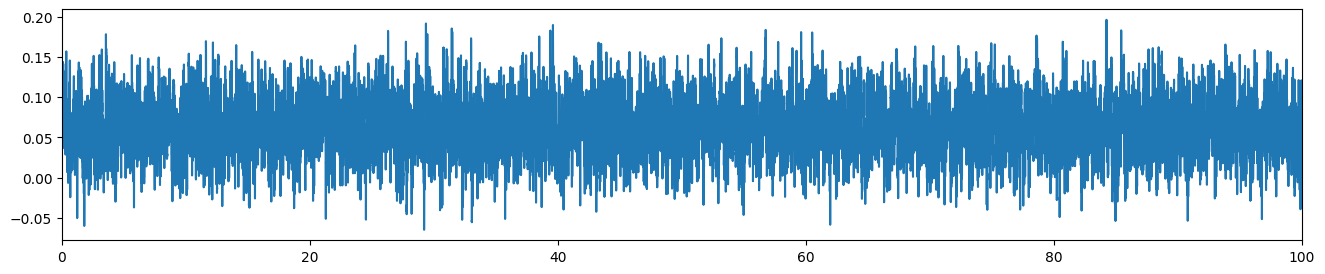

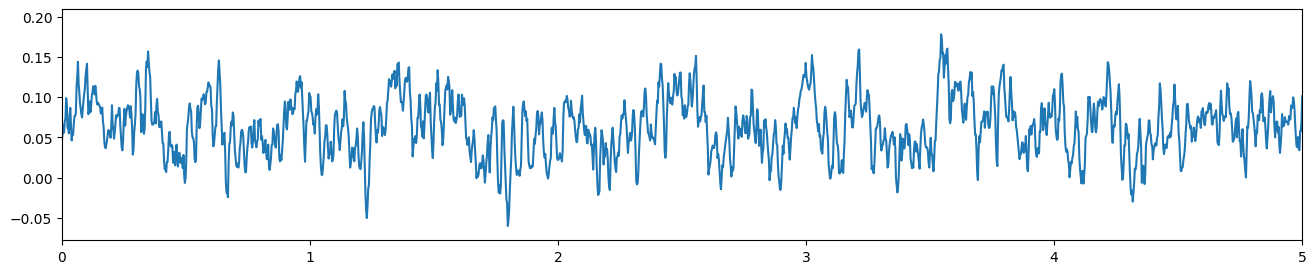

In [7]:
# Bonus step : let's look at this EEG
plt.figure(figsize=(16,3))
plt.plot(np.linspace(0, EEG_duration, EEG_number_sampling_points), EEG['values'][0])
plt.xlim(0, EEG_duration)
plt.show()

# Not really nice, let's zoom in
plt.figure(figsize=(16,3))
plt.plot(np.linspace(0, EEG_duration, EEG_number_sampling_points), EEG['values'][0])
plt.xlim(0, 5)
plt.show()

In [8]:
# Look up the 1000 first points in EEG trace
EEG_first_1000 = EEG['values'][0][:1000]
print(EEG_first_1000)

[ 0.04707336  0.05592346  0.06561279  0.05592346  0.06973267  0.07324219
  0.09887695  0.0919342   0.06164551  0.06080627  0.05500793  0.07705688
  0.08666992  0.06370544  0.04615784  0.0567627   0.05310059  0.06660461
  0.07629395  0.07659912  0.08026123  0.11238098  0.12542725  0.14404297
  0.11634827  0.10604858  0.0920105   0.08583069  0.07835388  0.07476807
  0.08636475  0.0958252   0.10437012  0.11070251  0.12664795  0.13458252
  0.14160156  0.10757446  0.07881165  0.08300781  0.09483337  0.08132935
  0.08934021  0.10299683  0.10620117  0.11352539  0.10719299  0.1033783
  0.11413574  0.10688782  0.09483337  0.09078979  0.09307861  0.09101868
  0.08956909  0.08743286  0.07965088  0.08262634  0.08705139  0.06988525
  0.06263733  0.04501343  0.03723145  0.03662109  0.04165649  0.04684448
  0.05462646  0.05905151  0.05401611  0.05378723  0.04951477  0.06324768
  0.09002686  0.06515503  0.05973816  0.04844666  0.05683899  0.06797791
  0.07766724  0.07507324  0.0769043   0.07843018  0.

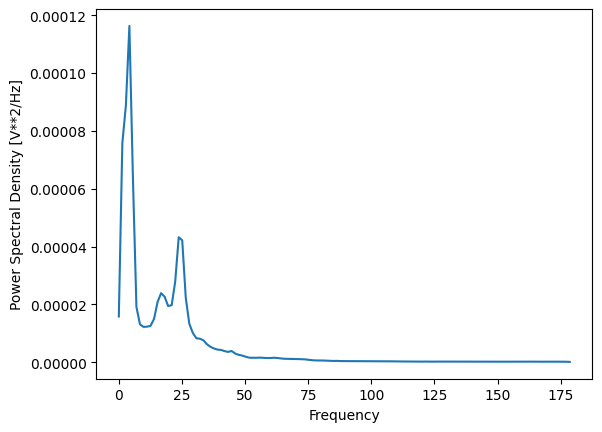

In [9]:
# Compute the spectral power density histogram (spectrum) of the EEG trace using scipy.signal.welch
# Ressource : https://raphaelvallat.com/bandpower.html
EEG_frequencies, EEG_spectral_power_density = scipy.signal.welch(EEG['values'][0], fs=1/EEG_time_sampling_interval)

plt.plot(EEG_frequencies, EEG_spectral_power_density)
plt.ylabel('Power Spectral Density [V**2/Hz]')
plt.xlabel('Frequency')
plt.show()

# plt.bar(EEG_frequencies, EEG_spectral_power_density)
# plt.ylabel('Power Spectral Density')
# plt.xlabel('Frequency')
# plt.show()

length: 725.0
resolution: 1.6e-06


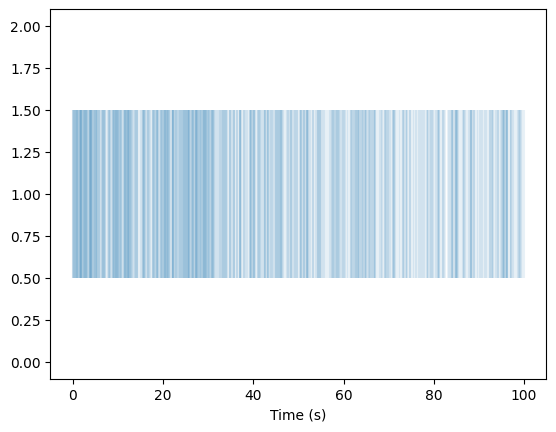

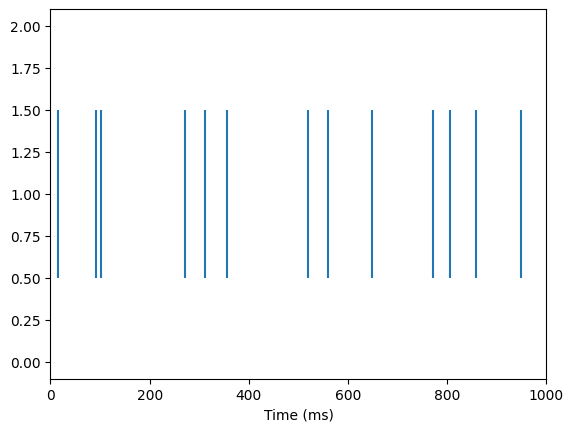

In [10]:
# Bonus step, let's look at what we can find into spike trains file
# Keys = comment length resolution times title
print('length:', ST1['length'][0][0])
print('resolution:', ST1['resolution'][0][0])

# In ST1['times'] we have a serie of spike times, we can display them on a raster plot
plt.eventplot(ST1['times'][0], alpha=0.1)
plt.xlabel('Time (s)')
plt.show()

# We have aprox 750 values between 0 and 100.
# It seems unlikely that neurons fire at more than 7,5 kHz (and we will assume recordings use SI), so I'll guess it is 100 seconds

# So now, let's zoom in
plt.eventplot(ST1['times'][0]*1000)
plt.xlabel('Time (ms)')
plt.xlim(0,1000)
plt.show()

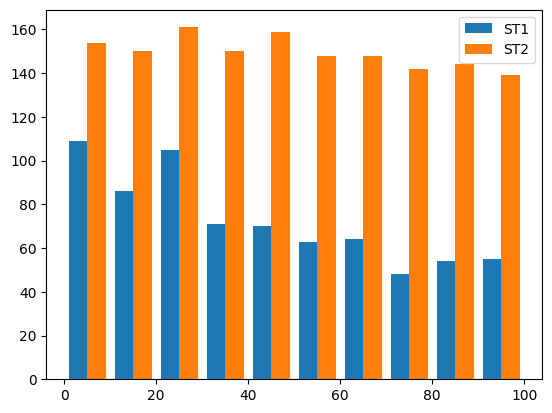

In [11]:
# Look up spike times for the two spike trains
# TODO: Je ne comprend plus rien, dans un bloc précédent on nous demande "3 spike trains" et là il n'y en a plus que 2 ? Où est passé le 3ème ?

# Display the times for the 2 firsts spike train
plt.hist((ST1['times'][0], ST2['times'][0]), bins=10, label=("ST1","ST2"))
plt.legend()
plt.show()

In [12]:
# Make an instantaneous firing rate in bins of 1 ms using the function np.histogram

IFR1 = np.histogram(ST1['times'][0], bins=100000, density=True)[0]
# durée de l'enregistrement = 100 s donc pour avoir des "bins" de 1ms, on écrit "bins = 100000" (ce qui correspond à "découper en 100000")
# on prend le premier élément [0] qui correspond au "instantaneous firing rate"

# Prenons un peu d'avance, et calculons ça pour tous les spikes trains
IFR2 = np.histogram(ST2['times'][0], bins=100000, density=True)[0]
IFR3 = np.histogram(ST3['times'][0], bins=100000, density=True)[0]

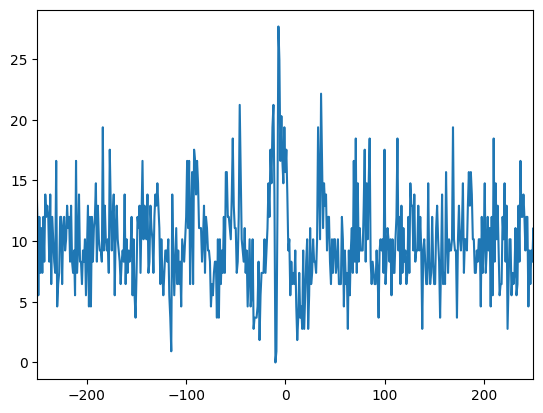

In [13]:
# Plot the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 for delays from -250ms to +250ms
cross_corr_12 = scipy.signal.correlate(IFR1, IFR2)
cross_corr_lag_vector = np.linspace(-99999, 99999, len(cross_corr_12))
plt.plot(cross_corr_lag_vector, cross_corr_12)
plt.xlim(-250, 250)
plt.show()
# C'est immonde...

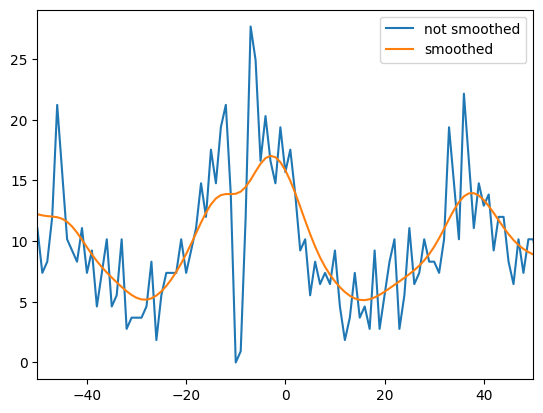

In [14]:
# Smooth the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 
# and plot for delays from -50ms to +50ms

# Je reprend la methode qu'on a vu la dernière fois, cependant je ne suis pas sur que ce soit le meilleur moyen de smooth le signal
window = np.arange(-10,10,0.1)            # Actual window over which to compute the Gaussian
gaussian = np.exp(-(window/0.5)**2)     # Gaussian function over window and standard deviation sigma
# Smoothed signal:
smooth_cross_corr_12 = np.convolve(cross_corr_12, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_12, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_12, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()
# On passe de vraiment immonde à moyennement immonde. Yes !

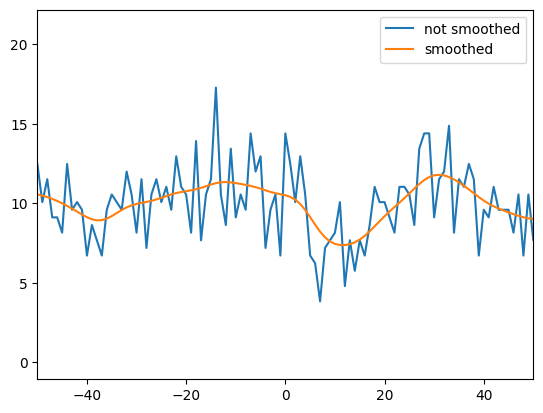

In [15]:
# Repeat the same procedure (cells 11 and 12) for spike trains 2 and 3
cross_corr_13 = scipy.signal.correlate(IFR1, IFR3)
smooth_cross_corr_13 = np.convolve(cross_corr_13, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_13, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_13, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()

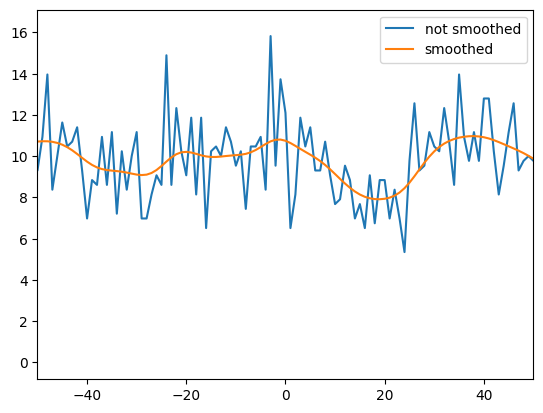

In [16]:
cross_corr_23 = scipy.signal.correlate(IFR2, IFR3)
smooth_cross_corr_23 = np.convolve(cross_corr_23, gaussian, mode="same") / np.sum(gaussian)

plt.plot(cross_corr_lag_vector, cross_corr_23, label='not smoothed')
plt.plot(cross_corr_lag_vector, smooth_cross_corr_23, label='smoothed')
plt.xlim(-50,50)
plt.legend()
plt.show()

In [17]:
# Repeat the procedure (cell 11 and 12) for all pairs of spike trains recorded in this file (ActivPark)
# To this end, you may use the 'keys' of the dataset, corresponding to the various signals recorded simultaneously. 
# Note that the first 3 signals correspond to EEG or filtered EEG and will not be considered here. All other 
# recorded signals are spike trains 

keys = list(data['ActivPark'].keys())[3:]
print(keys, len(keys))

# TODO: Je skip cette partie puisque je n'ai pas compris à quoi elle servait



['L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9'] 16


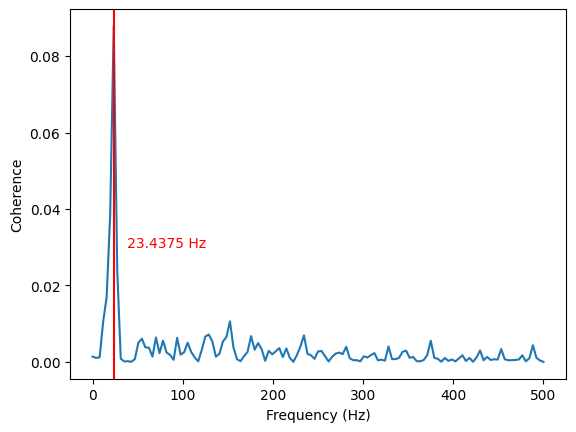

In [18]:
# Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with function scipy.signal.coherence
coherence_12 = scipy.signal.coherence(IFR1, IFR2, fs=1000)
# fs = sampling frequency of series. Here sample size is 1 ms, so we have 1000 samples/s (1000 Hz)
max_coherence_12_index = coherence_12[1].argmax()
max_coherence_12_frequency = coherence_12[0][max_coherence_12_index]

# Plot a vertical line at maximal coherence and get the corresponding frequency using the function plt.axvline
plt.plot(coherence_12[0], coherence_12[1])
plt.axvline(max_coherence_12_frequency, color='r')
plt.text(max_coherence_12_frequency,0.03, '   {} Hz'.format(max_coherence_12_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()

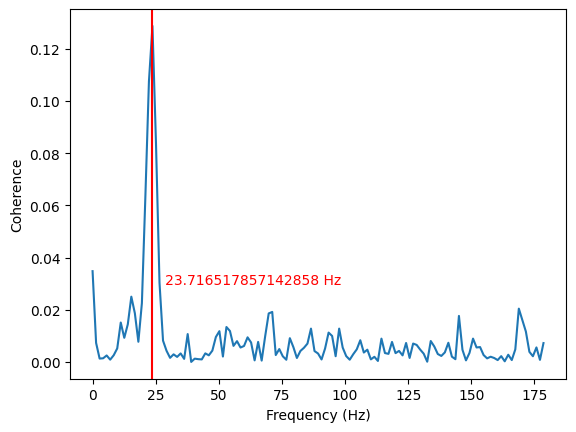

In [19]:
# We now want to compute the coherence between the EEG and the firing rates of single spike trains. 
# However, the coherence needs to be computed on signals that have the same sampling interval/rate

# First step: Recompute the IFR for a time bin similar to EEG sampling interval
EEG_frequency = 1/EEG_time_sampling_interval
bins_size = EEG_time_sampling_interval          # 2.8 ms
number_of_bins = round(100/bins_size)           # (sample size, 100 ms) / (bins_size, 2.8 ms) 
real_bins_size = 100/number_of_bins             # real size of bins (since we rounded the number of bins we won't have exactly bins_size

IFR1_resampled = np.histogram(ST1['times'][0], bins=number_of_bins)[0] / real_bins_size
IFR2_resampled = np.histogram(ST2['times'][0], bins=number_of_bins)[0] / real_bins_size
time_vector = np.arange(0, 100, EEG_time_sampling_interval*1000)
# TODO: c'est pas vraiment égal à la fréquence EEG donc pas vraiment la meilleure manière de faire. A revoir

# Second step: Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with new time bin
coherence_12_resampled = scipy.signal.coherence(IFR1_resampled, IFR2_resampled, fs=EEG_frequency)
max_coherence_12_resampled_index = coherence_12_resampled[1].argmax()
max_coherence_12_resampled_frequency = coherence_12_resampled[0][max_coherence_12_resampled_index]
plt.plot(coherence_12_resampled[0], coherence_12_resampled[1])
plt.axvline(max_coherence_12_resampled_frequency, color='r')
plt.text(max_coherence_12_resampled_frequency,0.03, '   {} Hz'.format(max_coherence_12_resampled_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()
# This coherence can compared to the one computed in cell 13.
# Plot a vertical line at maximal coherence and get the corresponding frequency

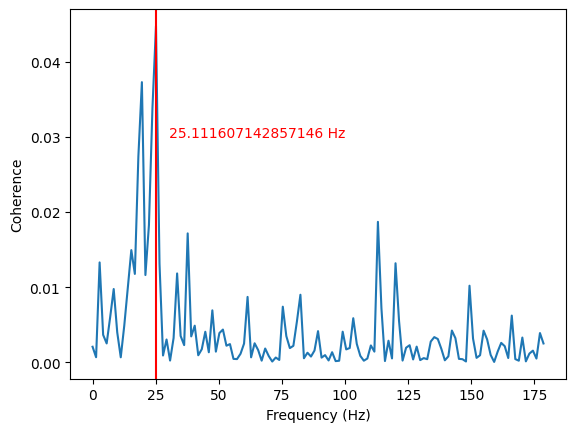

In [20]:
# Now we can compute the coherence between instantaneous firing rate (IFR) of a spike train and the EEG
coherence_1_EEG = scipy.signal.coherence(IFR1_resampled, EEG['values'], fs=EEG_frequency)

# Plot a vertical line at maximal coherence and get the corresponding frequency
coherence_1_EEG_index = coherence_1_EEG[1][0].argmax()
max_coherence_1_EEG_frequency = coherence_1_EEG[0][coherence_1_EEG_index]
plt.plot(coherence_1_EEG[0], coherence_1_EEG[1][0])
plt.axvline(max_coherence_1_EEG_frequency, color='r')
plt.text(max_coherence_1_EEG_frequency,0.03, '   {} Hz'.format(max_coherence_1_EEG_frequency), color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.show()

[1785.71428571]


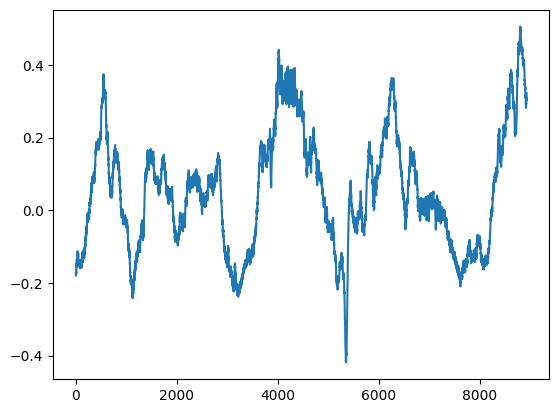

In [21]:
# Let's now look up a file with SWA activity in the cortex, and plot the 5 first seconds of this EEG
EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]
print(1/EEG_interval)

plt.plot(EEG_data[:int(5/EEG_interval)])
plt.show()

In [22]:
# Build a band pass filter with [0.5 1.5] Hz band for EEG using scipy.signal.butter
slow_waves_filter = scipy.signal.butter(3, [0.5, 1.5], btype='bandpass', fs=1/EEG_interval)

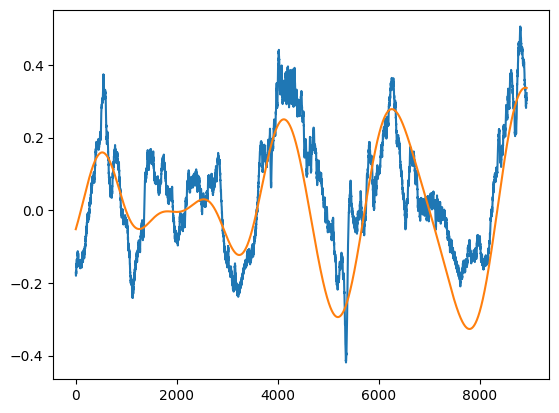

In [23]:
# Filter EEG with scipy.signal.filtfilt using the filter built in cell 18, and plot first 5 s of filtered EEG
eeg_slow_waves = scipy.signal.filtfilt(slow_waves_filter[0], slow_waves_filter[1], EEG_data)

plt.plot(EEG_data[:int(5/EEG_interval)])
plt.plot(eeg_slow_waves[:int(5/EEG_interval)])
plt.show()

3294
1.9998095999999999
98.0174096


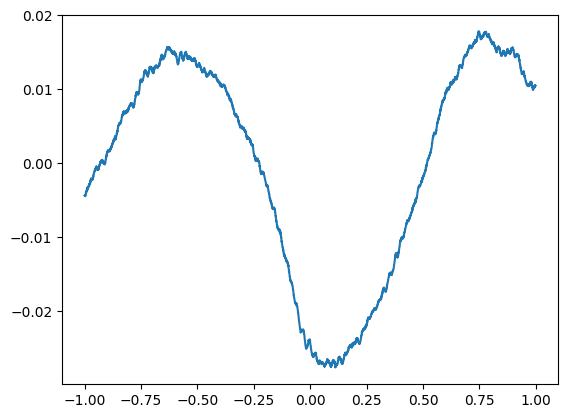

-0.024225651780057977


In [24]:
# Load one spike train and the EEG values and sampling interval from the SWAPark file
ST1=data['SWAPark']['L23_Pr20_c09'] 
ST1_times=ST1['times'][0]
print(len(ST1_times))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]


# Compute the spike-triggered average of the EEG trace with the first spike train

windowsec=2
windowint=windowsec/EEG_interval
t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
STA=np.zeros(int(windowint))
i1=np.argmin(np.abs(ST1_times-windowsec))
i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
print(ST1_times[i1])
print(ST1_times[i2])
for i in range(i1,i2):
    STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

STA=STA/(len(ST1_times)-2)
STA=STA-np.mean(STA)
plt.plot(t,STA)
plt.show()

# Value of the spike-triggered average at 0 time lag
print(STA[int(windowint/2)])


In [25]:
# Compute and plot the spike-triggered averages of the EEG with respect to all spike trains recorded in this SWAPark file
# You may use the keys of the data['SWAPark'] data set
# Save the value of the spike-triggered average at 0 time lag for all considered spike trains

STs = list(data['SWAPark'])[1:]
STa = {}

for spike_key in STs:
    ST = data['SWAPark'][spike_key]
    ST_times=ST['times'][0]

    i1=np.argmin(np.abs(ST_times-windowsec))
    i2=np.argmin(np.abs(ST_times-(len(EEG_data)*EEG_interval-windowsec)))
    # print(ST_times[i1])
    # print(ST_times[i2])
    
    for i in range(i1,i2):
        STA += EEG_data[int(ST_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST_times[i+1]/EEG_interval)+int(windowint/2)]

    STA=STA/(len(ST_times)-2)
    STA=STA-np.mean(STA)

    # Value of the spike-triggered average at 0 time lag
    STa[spike_key] = STA[int(windowint/2)]

# TODO: je n'ai pas bien compris ce qu'il fallait plot ici

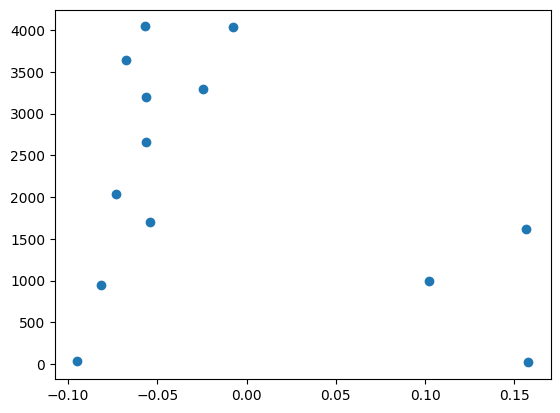

In [26]:
# For each spike train in the data set, compute the mean firing rate 

STt = {}

for spike_key in STs:
    ST = data['SWAPark'][spike_key]
    ST_length=ST['length'][0]
    STt[spike_key] = ST_length

# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag
plt.plot(list(STa.values()), list(STt.values()), 'o')
plt.show()